In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# q1

In [2]:
#Consider only the below columns and prepare a prediction model for predicting Price.
#Corolla<Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")

In [3]:
df = pd.read_csv(r"C:\Users\shiva\Downloads\ToyotaCorolla.csv",encoding='latin1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df.shape

(1436, 38)

In [5]:
#Consider only the below columns and prepare a prediction model for predicting Price.
#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Coefficients: [-1.20859866e+02 -2.14109713e-02  3.15722985e+01 -1.27693132e-01
  1.20005776e+01  5.14603172e+02  3.43610273e+00  1.80917460e+01]
Intercept: -6356.88165821055
Mean Squared Error: 1890054.9949856428
R-squared: 0.8559740238935252


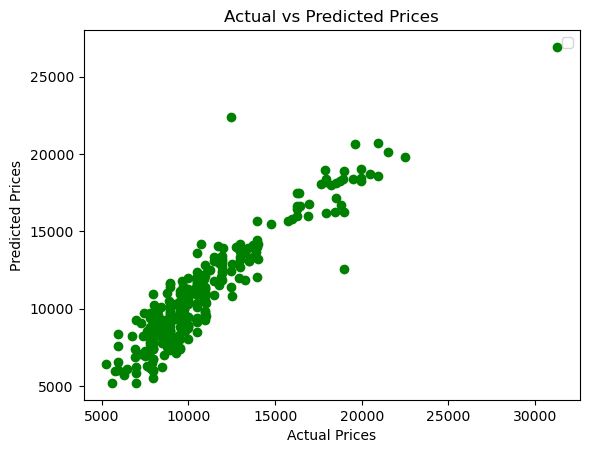

In [6]:
predicting_columns = ['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']
df = df[predicting_columns]

X = df.drop('Price',axis = 1)
y = df['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 12)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.scatter(y_test, y_pred,color = 'g')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()

In [14]:
import statsmodels.api as sm

X = df.drop('Price',axis = 1)
y = df['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)

# Fit the regression model
mlr_model = sm.OLS(train_y, train_X).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              9711.
Date:                Thu, 11 Jan 2024   Prob (F-statistic):                        0.00
Time:                        19:52:02   Log-Likelihood:                         -9920.4
No. Observations:                1148   AIC:                                  1.986e+04
Df Residuals:                    1140   BIC:                                  1.990e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -124.9740      2.773    -45.073      0.000    -130.414    -119.534
KM               -0.0219      0.001    -15.700      0.000      -0.025      -0.019
HP               34.2067      3.121     10.961      0.000      28.084      40.330
cc               -0.0866      0.093     -0.932      0.352      -0.269       0.096
Doors           -33.5573     46.087     -0.728      0.467    -123.983      56.868
Gears           -44.0445    174.981     -0.252      0.801    -387.366     299.277
Quarterly_Tax     5.4401      1.369      3.975      0.000       2.755       8.125
Weight           14.6909      0.906     16.209      0.000      12.913      16.469
==============================================================================
Omnibus:                       96.899   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.400
Skew:                          -0.049   Prob(JB):                    3.03e-120
Kurtosis:                       6.391   Cond. No.                     3.40e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, "Cook's Distance Plot")

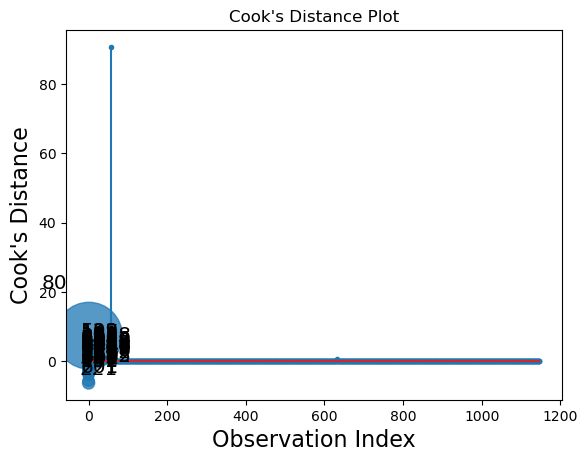

In [16]:
from statsmodels.stats.outliers_influence import OLSInfluence

X = df.drop('Price',axis = 1)
y = df['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=2)

mlr_model = sm.OLS(train_y, train_X).fit()
mlr_model.summary()

# influence and Cook's distance
influence = OLSInfluence(mlr_model)
influence_plot = influence.plot_influence()

# Cook's distance plot
cook_distance = influence.cooks_distance[0]
cook_distance_plot = plt.stem(np.arange(len(cook_distance)), cook_distance, markerfmt='.')
plt.xlabel('Actual price')
plt.ylabel("Predicted")
plt.title("Cook's Distance Plot")

# Q2
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

In [7]:
df1 = pd.read_csv(r"C:\Users\shiva\Downloads\50_Startups.csv")
df1.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


df1 = pd.read_csv(r"C:\Users\shiva\Downloads\50_Startups.csv")

X = df1[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df1['Profit']

X = pd.get_dummies(X, columns=['State'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create a function to fit and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - R-squared: {r2:.4f}")
    return r2

linear_model = LinearRegression()
linear_r2 = evaluate_model(linear_model, X_train, X_test, y_train, y_test, "Linear Regression")

# Print the coefficients and performance metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# multiregresssion Regression with different degrees
degrees = [3,5]
poly_r2_values = {}
for degree in degrees:
    poly_features = PolynomialFeatures(degree = degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    
    poly_model = LinearRegression()
    poly_r2 = evaluate_model(poly_model, X_poly_train, X_poly_test, y_train, y_test, f"Polynomial Regression(Degree {degree})")
    
    
    poly_r2_values[f'Degree {degree}'] = poly_r2

#Create a table of R-squared values
#results_table = pd.DataFrame({'Model': ['Linear Regression'] + [f'Polynomial Regression (Degree {degree})' for degree in degrees],
                             # 'R-squared': [linear_r2] + list(poly_r2_values.values())})

#print(results_table)
#df1.summary()


Linear Regression - R-squared: 0.9783
Coefficients: [-1.20859866e+02 -2.14109713e-02  3.15722985e+01 -1.27693132e-01
  1.20005776e+01  5.14603172e+02  3.43610273e+00  1.80917460e+01]
Intercept: -6356.88165821055
Mean Squared Error: 1890054.9949856428
R-squared: 0.8559740238935252
Polynomial Regression(Degree 3) - R-squared: -2.9718
Polynomial Regression(Degree 5) - R-squared: -652.7276


In [11]:
import statsmodels.api as sm
X_features = df1.drop(['State'], axis=1)

X = sm.add_constant(X_features)
y = df1['Profit']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)

# Fit the regression model
mlr_model = sm.OLS(train_y, train_X).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.337e+31
Date:                Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:46:43   Log-Likelihood:                 929.48
No. Observations:                  40   AIC:                            -1849.
Df Residuals:                      35   BIC:                            -1841.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const                    0   2.44e-11          0      1.000   -4.95e-11    4.95e-11
R&D Spend        -2.22e-16   3.12e-16     -0.711      0.482   -8.56e-16    4.12e-16
Administration   3.816e-16   1.34e-16      2.851      0.007     1.1e-16    6.53e-16
Marketing Spend  1.353e-16   4.49e-17      3.015      0.005    4.42e-17    2.26e-16
Profit              1.0000   3.53e-16   2.84e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        0.382   Durbin-Watson:                   1.297
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.042
Skew:                           0.067   Prob(JB):                        0.979
Kurtosis:                       3.086   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, "Cook's Distance Plot")

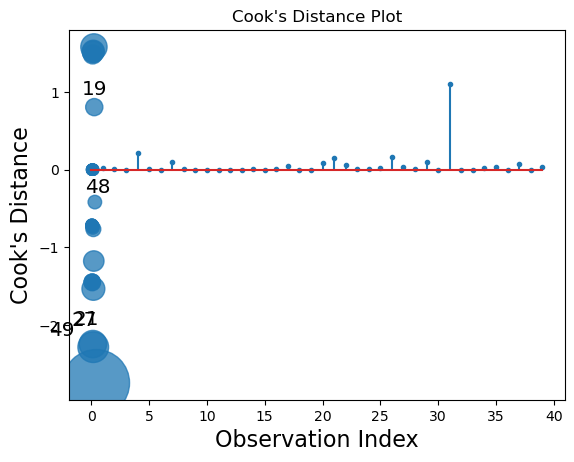

In [15]:
from statsmodels.stats.outliers_influence import OLSInfluence
X_features = df1.drop(['State'], axis=1)

X = sm.add_constant(X_features)
y = df1['Profit']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=2)

mlr_model = sm.OLS(train_y, train_X).fit()
mlr_model.summary()

# influence and Cook's distance
influence = OLSInfluence(mlr_model)
influence_plot = influence.plot_influence()

# Cook's distance plot
cook_distance = influence.cooks_distance[0]
cook_distance_plot = plt.stem(np.arange(len(cook_distance)), cook_distance, markerfmt='.')
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")